## **Data Science Aplicado a las Finanzas** üöÄ
### **Sesi√≥n 6: Modelos de Regresi√≥n**

Andr√©s C. Medina Sanhueza

Senior Data Scientist Engineer 

anmedinas@gmail.com

In [1]:
from matplotlib import pyplot as plt 
import statsmodels.api as sm
import pandas_datareader.data as web 
import pandas as pd 
import seaborn as sns
import yfinance as yf
import numpy as np

sns.set_style("dark")

## üêù ¬øQu√© es un modelo de regresi√≥n?

Un modelo de regresi√≥n consiste en un modelo estad√≠stico (en el contexto financiero tambi√©n es llamado modelo econom√©trico) que nos permite analizar y cuantificar la relaci√≥n entre distintas variables (en este contexto, variables econ√≥micas o financieras). En particular, se analiza el *efecto que una variaci√≥n de una variable econ√≥mica puede tener en la variaci√≥n de otra variable*.

Algunas aplicaciones:

1. `Macroeconom√≠a` Predicci√≥n de variables tales como el PIB, inflaci√≥n o cuantificar la relaci√≥n entre tasas de inter√©s-inflaci√≥n.
2. `Microeconomia` Cuantificar la relaci√≥n entre educaci√≥n y salario, factores productivos y producci√≥n, gastos en I+D y beneficios de la empresas.
3. `Finanzas` An√°lisis de volatilidad de los activos, modelos de valoraci√≥n de activos, etc.  

<div style="border: 1px solid #007acc; background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
   <strong> üìå Idea Intuitiva  :</strong>  tenemos un fen√≥meno que est√° siendo influenciado por otras variables, por lo tanto, creemos que existe alg√∫n tipo de relaci√≥n. Esta creencia que tenemos, debemos plasmarla en algo material, por lo tanto, necesitamos precisarla matem√°ticamente. Es decir, buscamos saber con la mayor precision posible, c√≥mo funciona esta relaci√≥n, por otro lado, ¬øesta relaci√≥n, es positiva?, ¬ønegativa?, ¬øes fuerte?, ¬ød√©bil?
</div>

## ü¶ñ Regresi√≥n Lineal

Intentamos explicar el comportamiento de cierto fen√≥meno a trav√©s de los siguientes componentes:

* **`variable explicada`** variable explicativa, independiente o a veces llamada regresora.
* **`variable dependiente`** variable dependiente, explicada o regresando.
* **`error`** perturbaci√≥n aleatoria, error de estimaci√≥n, shock ex√≥geno.

En el caso de explicar a trav√©s de una sola variable $X_1$, tenemos:

\begin{equation*}
Y = f(X_1) + \epsilon
\end{equation*}

En el caso con m√°s variables explicativas $k>1$, 

\begin{equation*}
Y = f(X_1, X_2, X_3, \cdots, X_k) + \epsilon
\end{equation*}

Cuando hablemos de *regresi√≥n simple*, estamos hablando de modelos con una sola variable explicativa, es decir:

\begin{equation*}
y = \beta_0 + \beta_1 x_1 + \epsilon
\end{equation*}

La interpretaci√≥n del modelo anterior, es que la variable $y$ (variable observada) estar√≠a siendo explicada por una constante $\beta_0$, una variable $x_1$ con un coeficiente $\beta_1$ y un error
$\epsilon$.

Por otro lado, cuando hablemos de  *regresi√≥n m√∫ltiple*, estaremos hablando de modelos con m√∫ltiples variables explicativas

\begin{equation*}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +  \beta_3 x_3 + \cdots  \beta_k x_k + \epsilon
\end{equation*}

La diferencia aqu√≠, es que no solo consideramos $x_1$ para explicar $y$, sino que a todas las 
dem√°s variables explicativas las cuales, cada una de ellas tiene su respectivo coeficiente $\beta_i$

**¬ø Qu√© significan todas estas nomenclaturas ?** ü§î

* $\bf{y}$ es la variable de nuestro interes y se denomina variable explicada o dependiente.
  
* $\bf{x_1,x_2,\cdots,x_k}$ representan a las variables que consideramos relevantes para el an√°lisis de la variable de nuestro inter√©s, y se les denomina variables explicativas. El valor 
de $k$ indica el n√∫mero de variables explicativas que estamos incluyendo en el modelo. 

* $\bf{\beta_1,\beta_2,\cdots,\beta_k}$ Son constantes que desconocemos su valor, pero que nos gustar√≠a conocer ya que miden el *efecto que las variables regresoras tienen en la variable regresada*. Se les denomina coeficientes del modelo de regresi√≥n.

* $\bf{\epsilon}$ 
  * Teoricamente hablando ...
    * Variable aleatoria que perturba una supuesta relaci√≥n estable entre $y$ y sus variables explicativas $x$, por eso es comunmente llamada perturbacion. 
    * Representa el efecto neto (positivo / negativo) sobre $y$ de todas las infinitas variables que no podemos captar con el modelo. 
  * Empiricamente hablando ...
    * Capta el error en la estimaci√≥n de los par√°metros, el error en la apropiada selecci√≥n y n√∫mero de variables explicativas, etc. En pocas palabras, no existe un modelo que explique de manera perfecta el comportamiento de una variable, por lo tanto, en la pr√°ctica, asumimos un cierto margen de error $\epsilon$

### Regresi√≥n Lineal Simple

**¬øCu√°l es el objetivo? üò¥** 

1. Seleccionar las variables que impactan en $y$ (apoyados en teor√≠a econ√≥mica, financiera, etc).
2. Encontrar de qu√© manera y en qu√© magnitud, impactan estas variables (estimacion de $\beta_i$)
3. Comprobar si el modelo definido es robusto y realmente existe causalidad entre $y$ y las variables que creemos que explican su comportamiento.

En un modelo de regresi√≥n lineal podemos observar los valores de la variable dependiente y de las variables independientes. Desconocemos los valores de los coeficientes $\beta_i$ y no podemos observar el t√©rmino del error $\epsilon$.

El principal objetivo es conocer los valores de los coeficientes, esto, es porque ellos *miden el efecto* que un cambio en su correspondiente variable regresora causa en la variable regresada.

**¬øC√≥mo funciona el modelo?** ‚òï

Primero, consideremos la tasa de inter√©s del tesoro americano a 10 a√±os (C√≥digo FRED: `GS10`) que es la tasa de inter√©s nominal anual que pagan los bonos del tesoro de EE.UU con vencimiento a 10 a√±os. Se considera una tasa libre de riesgo a largo plazo. Por otro lado, consideremos a un ETF de bonos del Tesoro de largo plazo (Ticker Yahoo: `TLT`) que es es un fondo cotizado (ETF) que invierte exclusivamente en bonos del Tesoro de EE.UU. con vencimientos mayores a 20 a√±os. 


<div style="display: flex; justify-content: space-around;">
  <img src="scatterplot.png" alt="Imagen 1" width = "300">
  <img src="scatterplot2.png" alt="Imagen 2" width = "300">
</div>

Cuando la tasa de inter√©s sube (GS10), los bonos existentes en el mercado (como los que tiene TLT) pagan un cup√≥n fijo que ahora es menos atractivo que las nuevas tasas del mercado. Por tanto, para igualar el atractivo, su precio de mercado baja. Cuando baj la tasa de inter√©s (GS10), los bonos existentes, con cupones m√°s altos que los nuevos bonos, se vuelven m√°s valiosos, por tanto el precio del bono sube, y con ello sube TLT (relaci√≥n lineal negativa).

**Idea üìå** Minimizar el error entre la observaci√≥n $y_i$ y lo que se ajusta $\hat{y}$, es decir, debemos construir una forma en que, la distancia entre lo que se observa y lo que se ajusta, sea lo mas m√≠nimo o peque√±o posible (minimizar $\epsilon_i = y_i - \hat{y}$). Sin embargo, debido a que no existen distancias negativas, debemos ser capaces de construir una forma de que las distancias sean mayores que 0, es decir

\begin{equation*}
\epsilon_{i}^2 = (y_i - \hat{y})^2
\end{equation*}

Cabe destacar que la expresi√≥n anterior, es para un punto espec√≠fico del diagrama de dispersi√≥n, sin embargo, debemos generalizarlo para todos los puntos del diagrama, por ende, debemos cuantificar el error de todos los puntos.

\begin{equation*}
\sum_{i=1}^{n}\epsilon_{i}^2 = \sum_{i=1}^{n}(y_i - \hat{y})^2
\end{equation*}

Por tanto, tenemos un modelo teorico definido como $y_i = \beta_0 + \beta_1 x_i + \epsilon$ y tenemos un modelo *ajustado* $\hat{y} = \widehat{\beta_0} + \widehat{\beta_1} x_i$, por lo tanto, la funcion a minimizar es: 

\begin{equation*}
S := \sum_{i=1}^{n}\epsilon_{i}^2 = \sum_{i=1}^{n}(y_i -  \widehat{\beta_0} - \widehat{\beta_1} x_i)^2
\end{equation*}

### M√©todos de Estimaci√≥n

#### M√≠nimos cuadrados

Vamos a explicar el m√©todo para hallar las estimaciones $\widehat{\beta_0}$ y $\widehat{\beta_1}$. Dicho m√©todo se conoce como *m√≠nimos cuadrados*.

Dada una observaci√≥n cualquiera de la muestra, $(x_i,y_i)$, podremos separar la componente $y_i$ como la suma de su valor predicho por el modelo y el error cometido: 

\begin{equation*}
y_i= \beta_0 + \beta_1 x_i + \epsilon_i \rightarrow \epsilon_i = y_i-(\beta_0+\beta_1x_i)
\end{equation*}

Llamamos **error cuadr√°tico te√≥rico** de este modelo a la suma al cuadrado de todos los errores cometidos por los valores de la muestra: 

\begin{equation*}
SS_E=\sum_{i=1}^n\epsilon_i^2=\sum_{i=1}^n(y_i-(\beta_0+\beta_1x_i))^2
\end{equation*}

La regresi√≥n lineal por m√≠nimos cuadrados consiste en hallar los estimadores $\widehat{\beta_0}$ y $\widehat{\beta_1}$ que minimicen el error cuadr√°tico te√≥rico. Es sencillo demostrar que los valores que optimizan son 

\begin{equation*}
\widehat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_i -\overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2} \quad \widehat{\beta_{0}} = \overline{y} - \widehat{\beta_1}\overline{x}
\end{equation*}

En estricto rigor, el estimador MCO es un procedimiento para determinar, aproximadamente los valores reales de los coeficientes del modelo de regresi√≥n simple $\beta_0$ y $\beta_1$ a partir de los datos de una muestra de las variables. El estimador se basa en una f√≥rmula que aplicada a los datos de la *muestra* proporciona estimaciones de los coeficientes del modelo de regresi√≥n.

\begin{equation*}
\min_{\widehat{\beta_0}, \widehat{\beta_1}}\sum_{i=1}^n\epsilon_i^2=\sum_{i=1}^n(y_i-(\widehat{\beta_0}+\widehat{\beta_1}x_i))^2
\end{equation*}


In [2]:
from matplotlib import pyplot as plt 
import pandas_datareader.data as web
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf 
import pandas as pd 
import seaborn as sns 
import numpy as np 

sns.set_style("dark")

In [3]:
# Descargar los datos
bond_price = yf.download('TLT', start='2015-01-01', end='2024-01-01', progress = False)['Close']
t10y = web.DataReader('GS10', 'fred', '2015-01-01', '2024-01-01')

# Resampleo mensual
bond_monthly = bond_price.resample('M').last()
t10y_monthly = t10y.resample('M').last()

# Merge
df = pd.concat([bond_monthly, t10y_monthly], axis=1)
df.columns = ['Precio_TLT', 'Tasa10Y']
df = df.dropna()

YF.download() has changed argument auto_adjust default to True


In [4]:
df.head()

Precio_TLT  Tasa10Y
2015-01-31  105.614182     1.88
2015-02-28   99.131203     1.98
2015-03-31  100.213913     2.04
2015-04-30   96.781433     1.94
2015-05-31   94.485298     2.20

In [5]:
# Implementacion manual de estimadores
xbar = df['Tasa10Y'].mean()
ybar = df['Precio_TLT'].mean()

beta_1 = np.sum((df['Tasa10Y']-xbar)*(df['Precio_TLT']-ybar)) / np.sum((df['Tasa10Y'] - xbar)**2)
beta_0 = ybar - beta_1*xbar 

In [6]:
print(f"(intercepto): {beta_0:.4f}")
print(f"(pendiente): {beta_1:.4f}")

(intercepto): 142.8554
(pendiente): -14.8853


In [7]:
# Estimacion mediante statsmodels
model = smf.ols(formula = 'Precio_TLT ~ Tasa10Y', data = df).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Precio_TLT   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.77e-29
Time:                        16:09:49   Log-Likelihood:                -390.02
No. Observations:                 108   AIC:                             784.0
Df Residuals:                     106   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.8554      2.335     61.178      0.000     138.226     147.485
Tasa10Y      -14.8853      0.946    -15.728      0.000     -16.762     -13.009
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.852
Skew:                          -0.383   Prob(JB):                       0.0197
Kurtosis:                       1.924   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

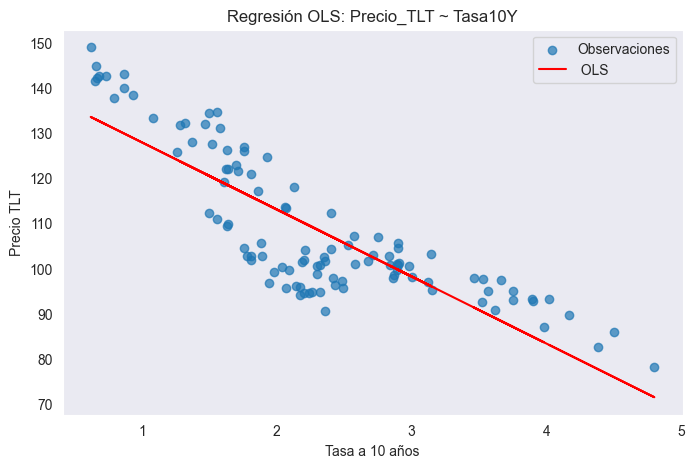

In [9]:
# Genero la prediccion con el  modelo ols 
df['Predicted_TLT'] = model.predict(df)

# Visualizacion de la estimacion
plt.figure(figsize=(8, 5))
plt.scatter(df['Tasa10Y'], df['Precio_TLT'], alpha = 0.7, label = 'Observaciones')
plt.plot(df['Tasa10Y'], df['Predicted_TLT'], color='red', label = ' OLS')
plt.xlabel('Tasa a 10 a√±os')
plt.ylabel('Precio TLT')
plt.title('Regresi√≥n OLS: Precio_TLT ~ Tasa10Y')
plt.legend()
plt.show()

üëÄ **¬ø De qu√© manera afecta la relaci√≥n ?**

Otra forma de escribir la pendiente del modelo, $\beta_1$ es de la siguiente forma: 

\begin{equation*}
\widehat{\beta_1} = \frac{\textsf{Cov}(x,y)}{\textsf{Var}(x)}
\end{equation*}

La covarianza $\textsf{Cov}(x,y)$ es una medida numerica que indica si existe o no , relacion lineal entre dos variables. 

Un estimador muestral insesgado de la covarianza $S_{xy}$ esta dado por : 

\begin{equation*}
S_{xy} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \overline{x})(y_{i} - \overline{y})
\end{equation*}

* Si $S_{xy}>0$ existe dependencia directa o positiva
* Si $S_{xy}=0$ no existe relacion lineal 
* Si $S_{xy}<0$ existe dependencia inversa o negativa 

A diferencia de la covarianza, que mide la relaci√≥n (si es que existe), entre dos variables en t√©rminos de direcci√≥n, la correlaci√≥n mide la magnitud o fuerza de la relaci√≥n. El estimador insesgado del coeficiente de correlaci√≥n para una muestra con $n$ observaciones viene dado por:

\begin{equation*}
r_{xy} = \frac{S_{xy}}{S_x S_y} = \frac{1}{n-1}\frac{\sum_{i=1}^{n}x_{i}y_{i} - n\overline{x}\overline{y}}{S_x S_y}
\end{equation*}

* Si $r_{xy} = 1$ existe correlacion positiva o directa perfecta
* Si $0 < r_{xy} < 1$ existe correlacion positiva 
* Si $r_{xy} = 0$ no existe correlacion lineal
* Si $-1 < r_{xy} < 0$  existe correlacion negativa
* Si $r_{xy} = -1$ existe correlacion negativa o inversa perfecta

## ü¶ä Supuestos de Gauss-Markov

Los supuestos de Gauss-Markov son los supuestos b√°sicos del modelo de regresi√≥n simple; supuestos necesarios para que los valores obtenidos mediante el estimador MCO sean considerados fiables

### üìå S1. Linealidad

Existe una relaci√≥n lineal entre la variable explicada y la explicativa. Cuando nos referimos a modelo de regresi√≥n lineal nos estamos refiriendo a linealidad con respecto a los coeficientes $\beta_0$ y $\beta_1$ , y no con respecto a las variables.

### üìå S2. Muestra Aleatoria

La muestra tomada de las variables aleatorias $\{x_i,y_i\}$, con $i=1,2,\cdots,N$ debe ser una muestra aleatoria que sigue el modelo de regresi√≥n lineal $y=\beta_0 + \beta_1x + \epsilon_i$

### üìå S3. Varianza constante 

Los valores de la variable explicativa $x_i$ no pueden ser todas iguales es decir, $x$ no puede ser constante

### üìå S4. Exogeneidad

$\mathbb{E}(\epsilon_i | x_i) = 0$ para $i=1\cdots N$, esto es equivalente a decir que 
$\mathbb{E}(y_i | x_i) = \beta_0 + \beta_1 x_i$ para $i=1\cdots N$. A la expresion $\mathbb{E}(y_i | x_i) = \beta_0 + \beta_1 x_i$ se le denomina recta de regresion poblacional.

Las perturbaciones son *sorteos aleatorios* de una poblacion. Dado que no tenemos informacion util para predecir el valor de la perturbacion, y con el fin de no tener ningun sesgo, asumiremos que las perturbaciones $\epsilon_i \sim\mathcal{N}(0,\sigma^2)$, esto significa que las perturbaciones tienen valor esperado condicional 0 con respecto a cualquier observacion, es decir $\mathbb{E}(\epsilon_i | x_i) = 0$. Factores no incluidos explicitamente en el modelo y por consiguiente incorporados en $\epsilon_i$, no afectan sistematicamente el valor de la media de $y$.

Si la media condicionada de una variable aleatoria, dada otra variable aleatoria es cero entonces su covarianza tambi√©n es cero, esto implica que las dos variables no estan correlacionadas y por lo tanto, este supuesto nos dice que $x_i$ y $\epsilon_i$ no esten correlacionadas. 

### üìå S5. Homocedasticidad

La varianza del error es constante para todas las observaciones en la muestra, es decir:

\begin{equation*}
\begin{aligned}
\textsf{Var}(\epsilon_i | x_i) &= \sigma^2 \\
\textsf{Cov}(\epsilon_i, \epsilon_j | x) &= \mathbb{E}(\epsilon_i \epsilon_j | x) = 0
\end{aligned}
\end{equation*}

Esto significa que la variaci√≥n alrededor de la l√≠nea de regresi√≥n, es la misma para todos los valores de $x$; no aumenta ni disminuye conforme var√≠a $x$.

## üêô Distribuciones muestrales de los estimadores MCO

Las propiedades estad√≠sticas de los estimadores MCO se derivan de su f√≥rmula y de los supuestos del modelo lineal.

\begin{equation*}
\widehat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_i -\overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2} \quad \widehat{\beta_{0}} = \overline{y} - \widehat{\beta_1}\overline{x}
\end{equation*}

El estimador MCO es insesgado.

\begin{equation*}
\mathbb{E}(\widehat{\beta_0} | x) = \beta_0 ,\quad \mathbb{E}(\widehat{\beta_1} | x) = \beta_1
\end{equation*}

Las varianzas de los estimadores MCO son:

\begin{equation*}
\begin{aligned}
\textsf{Var}(\widehat{\beta_1}) & = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \overline{x})^2} = \frac{\sigma^2}{(n-1)S_{x}^2} \\ 
\textsf{Var}(\widehat{\beta_0}) & = \frac{\sigma^2 \sum_{i=1}^{n}x_{i}^2}{\sum_{i=1}^{n}(x_i - \overline{x})^2} = \frac{\sigma^2 \overline{x}^2}{(n-1)S_{x}^2} 
\end{aligned}
\end{equation*}

* Cuanto mayor es la varianza del t√©rmino del error ,$\sigma^2$, mayor es la varianza de $\widehat{\beta_1}$, si la varianza de la parte no observable que afecta a $y$ es muy grande, es muy dif√≠cil de estimar $\beta_1$ con precisi√≥n.

* Cuanto mayor es la varianza de las $x_i$ ,menor es la varianza de $\widehat{\beta_1}$, si las $x_i$ tienen muy poca dispersi√≥n es muy dif√≠cil de estimar Œ≤1 con precisi√≥n.

* Cuanto mayor es el tama√±o muestral, menor es la varianza de $\widehat{\beta_1}$.

* Cuanto mayor sea $R_{j}^2$ (la correlaci√≥n del regresor con el resto de los regresores), mayor ser√° la varianza de $\widehat{\beta_j}$.

In [10]:
# Funci√≥n para simular y estimar var(beta_1)
def simulate_var_beta1(n, var_x, sigma, seed = 0):
    np.random.seed(seed)
    x = np.random.normal(0, np.sqrt(var_x), n)
    epsilon = np.random.normal(0, sigma, n)
    y = 2 * x + epsilon  # beta_0 = 0, beta_1 = 2

    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    var_beta1 = model.bse[1]**2
    r_squared = model.rsquared
    return var_beta1, r_squared

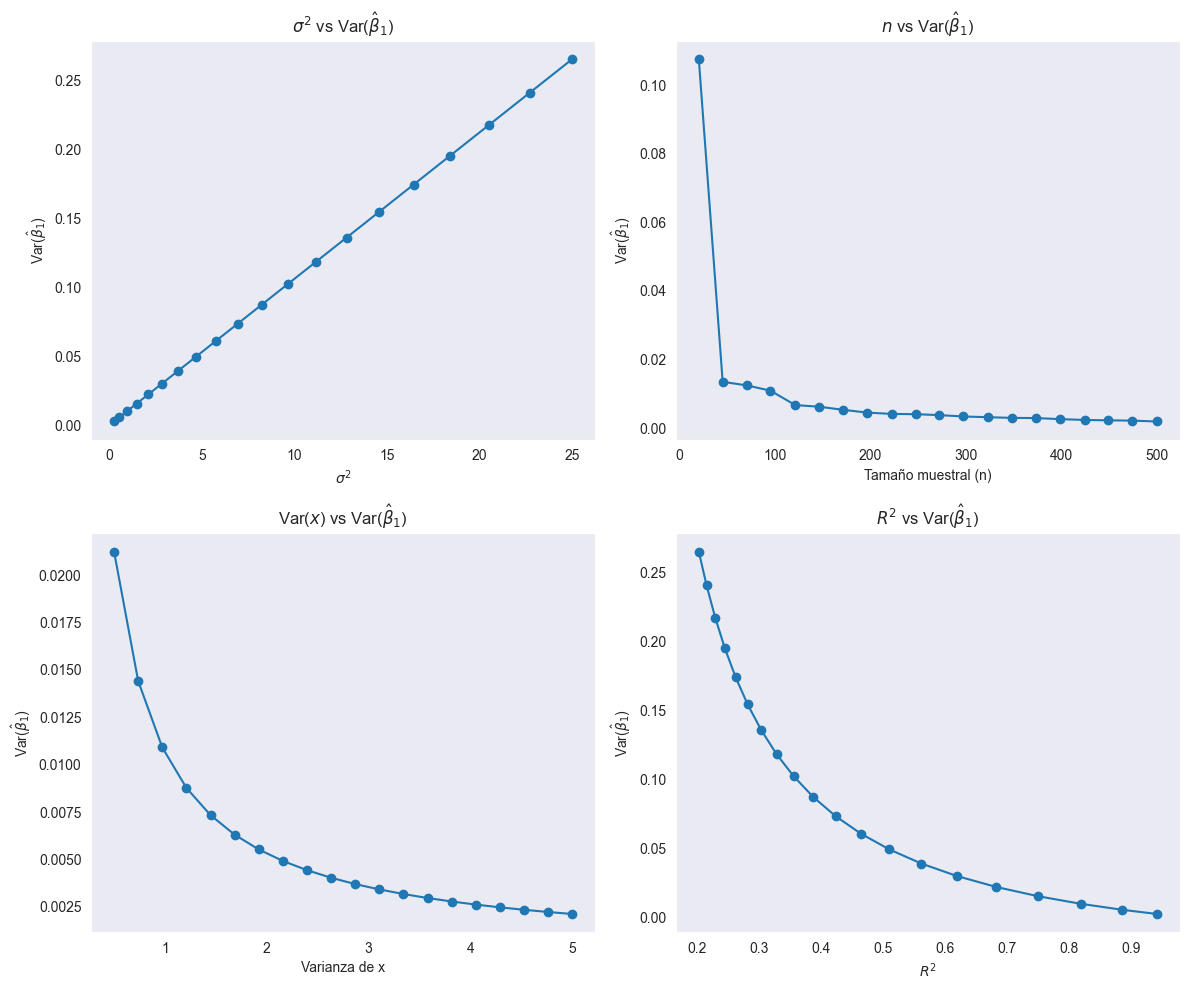

In [11]:
# Configuraciones a probar
sigmas = np.linspace(0.5, 5, 20)
Ns = np.linspace(20, 500, 20, dtype = int)
var_xs = np.linspace(0.5, 5, 20)
r2_values = []

# Almacenar resultados
var_beta_sigma = []
var_beta_n = []
var_beta_varx = []
var_beta_r2 = []

# Experimento 1: sigma^2 vs Var(beta_1)
for sigma in sigmas:
    var_beta1, _ = simulate_var_beta1(n=100, var_x=1, sigma=sigma)
    var_beta_sigma.append((sigma**2, var_beta1))

# Experimento 2: N vs Var(beta_1)
for n in Ns:
    var_beta1, _ = simulate_var_beta1(n=n, var_x=1, sigma=1)
    var_beta_n.append((n, var_beta1))

# Experimento 3: Var(x) vs Var(beta_1)
for var_x in var_xs:
    var_beta1, _ = simulate_var_beta1(n=100, var_x=var_x, sigma=1)
    var_beta_varx.append((var_x, var_beta1))

# Experimento 4: R^2 vs Var(beta_1)
# Para forzar distintos R^2, controlamos sigma
for sigma in sigmas:
    var_beta1, r2 = simulate_var_beta1(n=100, var_x=1, sigma=sigma)
    var_beta_r2.append((r2, var_beta1))

# --- Graficar los resultados ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: sigma^2 vs Var(beta_1)
x1, y1 = zip(*var_beta_sigma)
axs[0, 0].plot(x1, y1, 'o-')
axs[0, 0].set_title(r"$\sigma^2$ vs Var($\hat\beta_1$)")
axs[0, 0].set_xlabel(r"$\sigma^2$")
axs[0, 0].set_ylabel(r"Var($\hat\beta_1$)")

# Subplot 2: N vs Var(beta_1)
x2, y2 = zip(*var_beta_n)
axs[0, 1].plot(x2, y2, 'o-')
axs[0, 1].set_title(r"$n$ vs Var($\hat\beta_1$)")
axs[0, 1].set_xlabel("Tama√±o muestral (n)")
axs[0, 1].set_ylabel(r"Var($\hat\beta_1$)")

# Subplot 3: Var(x) vs Var(beta_1)
x3, y3 = zip(*var_beta_varx)
axs[1, 0].plot(x3, y3, 'o-')
axs[1, 0].set_title(r"Var($x$) vs Var($\hat\beta_1$)")
axs[1, 0].set_xlabel("Varianza de x")
axs[1, 0].set_ylabel(r"Var($\hat\beta_1$)")

# Subplot 4: R^2 vs Var(beta_1)
x4, y4 = zip(*var_beta_r2)
axs[1, 1].plot(x4, y4, 'o-')
axs[1, 1].set_title(r"$R^2$ vs Var($\hat\beta_1$)")
axs[1, 1].set_xlabel(r"$R^2$")
axs[1, 1].set_ylabel(r"Var($\hat\beta_1$)")

plt.tight_layout()
plt.show()

Las varianzas de $\widehat{\beta_0}$ y $\widehat{\beta_1}$ dependen de los valores muestrales de las $x_i$ que son observables y de la varianza del t√©rmino del error, $\sigma^2$ que es un par√°metro desconocido, por lo tanto, para poder estimar la varianza de $\widehat{\beta_0}$ y $\widehat{\beta_1}$ primero tenemos que obtener un estimador de $\sigma^2$.

Dado que $\sigma^2$ es la varianza del termino de error $\epsilon$ , que como mostramos anteriormente, coincide con la esperanza de $\epsilon^2$ , podriamos utilizar la media muestral de los errores al cuadrado como estimador de $\sigma^2$.

\begin{equation*}
\widehat{\sigma^2} = \frac{1}{n}\sum_{i=1}^{n}\epsilon_{i}^2
\end{equation*}

El problema, es que no se puede calcular ya que los *errores son no observados*. Sin embargo, lo que si podemos calcular, son los residuos $\widehat{\epsilon}$.

#### üìå Valores Ajustados y Residuos

Consideremos de nuevo el modelo de regresi√≥n lineal simple

\begin{equation*}
y_i= \beta_0 + \beta_1 x_i + \epsilon_i 
\end{equation*}

Llamaremos *valores ajustado* a los valores de la variable explicada que obtenemos siguiendo el modelo de regresi√≥n lineal simple con los valores de los coeficientes estimados.

\begin{equation*}
\widehat{y_i} = \widehat{\beta_0} + \widehat{\beta_1} x_i 
\end{equation*}

<tr>
<center>
<td><img src="fit_residuals.png" style="width: 600px;"/> </td>
</center>
</tr>

A la diferencia entre el valor observado y el valor ajustado de la variable explicada, se le denomina *residuo*

\begin{equation*}
\widehat{\epsilon_i} = y_{i} - \widehat{y} = y_i - (\widehat{\beta_0} + \widehat{\beta_1} x_i) 
\end{equation*}

Algunas propiedades 

* La suma de los residuos es siempre cero : $\sum_{i=1}^{N}\widehat{\epsilon_i} = 0$

* La covarianza muestral entre la variable regresora $x$ y los residuos $\widehat{\epsilon}$
es cero, es decir $\sum_{i=1}^{N}x_i\widehat{\epsilon_i} = 0$

* La covarianza muestral entre los valores ajustados y los residuos es 0, es 
decir  $\sum_{i=1}^{N}\widehat{y_i}\widehat{\epsilon_i} = 0$

---

La varianza muestral es un estimador de la varianza muestral del error : 

\begin{equation*}
\widehat{\sigma^2} = \frac{1}{n-2}\sum_{i=1}^{n}\widehat{\epsilon_i} ^ 2
\end{equation*}

Utilizando este estimador para $\sigma^2$, se definen las varianzas estimadas de $\widehat{\beta_1}$ y $\widehat{\beta_0}$

\begin{equation*}
\textsf{Var}(\widehat{\beta_1}) =  \frac{\widehat{\sigma^2}}{(n-1)S_{x}^2}, \quad 
\textsf{Var}(\widehat{\beta_0}) = \frac{\widehat{\sigma^2} \overline{x}^2}{(n-1)S_{x}^2}
\end{equation*}

## ü™º Bondad de Ajuste 

Necesitamos una medida que nos indique c√≥mo de bien se ajustan los valores estimados a partir de la variable independiente a los valores observados de la variable dependiente. Es decir, una medida que nos indique que tan bien, la variable independiente explica los valores observados de la variable dependiente. Una medida de bondad de ajuste es el coeficiente de determinaci√≥n $R^2$.

Recordemos que, una de las propiedades del estimador MCO es que

\begin{equation*}
\widehat{\epsilon}^2 = (y_i - \widehat{y_i})^2 
\end{equation*}

Si restamos $\overline{y}$ a ambos lados de la igualdad, y aplicamos sumatoria, tenemos la siguiente igualdad.

\begin{equation*}
\underbrace{\sum_{i=1}^{n}(y_i - \widehat{y_i})^2}_{\textsf{SCT}}  = \underbrace{\sum_{i=1}^{n}(\widehat{y_i}-\overline{y})^2}_{\textsf{SCE}} + \underbrace{\sum_{i=1}^{n}\widehat{\epsilon}^2}_{\textsf{SCR}}
\end{equation*}

Donde $\textsf{SCT}$ es la suma cuadr√°tica total,  $\textsf{SCE}$ es la suma cuadr√°tica explicada y $\textsf{SCR}$ suma cuadr√°tica de los residuos. Diviendo por $\textsf{SCT}$ y mediante un arreglo algebraico, tenemos lo siguiente: 

\begin{equation*}
R^2 = \frac{\textsf{SCE}}{\textsf{SCT}} = 1 - \frac{\textsf{SCR}}{\textsf{SCT}}
\end{equation*}

El coeficiente de determinaci√≥n $R^2$ mide la proporci√≥n de la variabilidad de la variable dependiente que es explicada por la variable independiente. Notar que el valor de $R^2$ siempre esta comprendido entre 0 y 1.


In [12]:
df.head()

Precio_TLT  Tasa10Y  Predicted_TLT
2015-01-31  105.614182     1.88     114.871034
2015-02-28   99.131203     1.98     113.382503
2015-03-31  100.213913     2.04     112.489384
2015-04-30   96.781433     1.94     113.977916
2015-05-31   94.485298     2.20     110.107734

In [13]:
# Construyo vectores  X e Y 
x = df['Tasa10Y']
y = df['Precio_TLT']

# Calculo media de las variables X e Y 
xbar = x.mean()
ybar = y.mean()

# Obtengo los betas del modelo 
beta_1 = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar)**2)
beta_0 = ybar - beta_1 * xbar

# Calculo Predicciones
y_hat = df['Predicted_TLT'] # usar los del modelo anterior
# y_hat = beta_0 + beta_1 * x # o construirlos 

# Paso 4: Calcular SSR y SST
SSR = np.sum((y - y_hat)**2)
SST = np.sum((y - ybar)**2)

# Paso 5: Calcular R¬≤
R2 = 1 - SSR / SST

print(f"Coeficiente de determinaci√≥n R¬≤ = {R2:.4f}")

Coeficiente de determinaci√≥n R¬≤ = 0.7000


In [14]:
model = smf.ols(formula = 'Precio_TLT ~ Tasa10Y', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Precio_TLT   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.77e-29
Time:                        16:09:50   Log-Likelihood:                -390.02
No. Observations:                 108   AIC:                             784.0
Df Residuals:                     106   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.8554      2.335     61.178      0.000     138.226     147.485
Tasa10Y      -14.8853      0.946    -15.728      0.000     -16.762     -13.009
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.852
Skew:                          -0.383   Prob(JB):                       0.0197
Kurtosis:                       1.924   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.rsquared

0.7000382702158906

## üê§ Pruebas de Hip√≥tesis

Recordar que tanto los coeficientes $\beta$ como la varianza del error $\sigma^2$ no se observan nunca (no conocemos su valor). Por tanto, a partir de una muestra aleatoria , y de las formulas construidas del estimador MCO obtenemos valores estimados para $\widehat{\beta_j}$ y $\widehat{\sigma^2}$

La inferencia, es una parte de la estad√≠stica que nos permite contrastar si podemos rechazar o no, una hip√≥tesis sobre el par√°metro del modelo. Como no conocemos los valores de los coeficientes la decisi√≥n de rechazar o no una hip√≥tesis sobre los par√°metros va a depender de los valores estimados de los par√°metros. Adem√°s, necesitaremos saber las distribuciones estad√≠sticas de los estimadores MCO de los par√°metros. Anteriormente, vimos que:

\begin{equation*}
\begin{aligned}
\mathbb{E}(\widehat{\beta_0}) &= \beta_0 \quad \textsf{Var}(\widehat{\beta_0}) = \frac{\widehat{\sigma^2} \overline{x}^2}{(n-1)S_{x}^2} \\
\mathbb{E}(\widehat{\beta_1}) &= \beta_1 \quad \textsf{Var}(\widehat{\beta_1}) =  \frac{\widehat{\sigma^2}}{(n-1)S_{x}^2}
\end{aligned}
\end{equation*}

Para conocer la distribuci√≥n de $\beta_j$. tenemos que suponer una distribuci√≥n al termino del error. 

### üìå S6. Normalidad

El t√©rmino del error $\epsilon$ es independiente de las variables regresoras $x_1, x_2,\cdots, x_k$ y se distribuye $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$. A partir de las distribuciones de $\epsilon$ podremos obtener las distribuciones de $y,\hat{y},\widehat{\beta_j}, \widehat{\sigma^2}$ condicionada a los valores de la muestra de las variables regresoras $x_1, x_2,\cdots, x_k$.

---

Con el supuesto anterior, podemos construir las distribuciones correspondientes:

* Distribuci√≥n de $y$ condicionada a los valores de la muestra de la variable regresora. 

\begin{equation*}
y_{i}|x \sim \mathcal{N}(\beta_0 + \beta_1x_{1}, \sigma^2)
\end{equation*}

* Distribici√≥n de $\beta_j$ condicionada a los valores de la muestra de la variable regresora.

\begin{equation*}
\begin{aligned}
\widehat{\beta_0} &\sim \mathcal{N}\left(\beta_0, \frac{\sigma^2 \overline{x}^2}{(n-1)S_{x}^2}  \right) \\
\widehat{\beta_1} &\sim  \mathcal{N}\left(\beta_1, \frac{\sigma^2}{(n-1)S_{x}^2} \right)
\end{aligned}
\end{equation*}

* Distribuci√≥n de $\widehat{\sigma^2}$ condicionada a los valores de la muestra de la variable regresora.

\begin{equation*}
\frac{(n-k-1)\widehat{\sigma^2}}{\sigma^2} \sim \chi_{n-k-1}^2
\end{equation*}

Donde $ \chi_{n-k-1}^2$ es una distribuci√≥n chi-cuadrado con $n-k-1$ grados de libertd. Adem√°s, se cumple que bajo el supuesto de normalidad S6, $\widehat{beta_j}$ y $\widehat{\sigma^2}$ son independientes. 

Esta propiedad es clave puesto que es necesaria para obtener la siguiente distribuci√≥n para cada coeficiente de regresi√≥n.

\begin{equation*}
\frac{\widehat{\beta_j}-\beta_j}{\textsf{SE}(\beta_j)} \sim t_{n-k-1} \quad \textsf{t-ratio}
\end{equation*}

Donde $t_{n-k-1}$ es una distribuci√≥n $t$-student con $n-k-1$ grados de libertad. 

In [16]:
# calculo de t-ratio 

# construyo vectores  X e Y 
x = df['Tasa10Y']
y = df['Precio_TLT']
n = len(x)

# calculo media de las variables X e Y 
xbar = x.mean()
ybar = y.mean()

Sxx = np.sum((x - xbar)**2)
Sxy = np.sum((x - xbar) * (y - ybar))

# obtengo los betas del modelo 
beta_1 = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar)**2)
beta_0 = ybar - beta_1 * xbar

# calculo predicciones
y_hat = df['Predicted_TLT'] 

# residuos 
residuals = y - y_hat

# calculo de sigma^2
sigma2_hat = np.sum(residuals**2) / (n - 2)

# errores estandar
se_beta_1 = np.sqrt(sigma2_hat / Sxx)
se_beta_0 = np.sqrt(sigma2_hat * (1/n + xbar**2 / Sxx))

# t-ratios
t_beta_1 = beta_1 / se_beta_1
t_beta_0 = beta_0 / se_beta_0

# Imprimir resultados
print(f"beta_1 = {beta_1:.4f}, SE = {se_beta_1:.4f}, t = {t_beta_1:.4f}")
print(f"beta_0 = {beta_0:.4f}, SE = {se_beta_0:.4f}, t = {t_beta_0:.4f}")

beta_1 = -14.8853, SE = 0.9464, t = -15.7283
beta_0 = 142.8554, SE = 2.3351, t = 61.1780


In [17]:
# estimador de la varianza de los errores 
sigma2_hat

81.72236618618285

In [18]:
model = smf.ols(formula = 'Precio_TLT ~ Tasa10Y', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Precio_TLT   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.77e-29
Time:                        16:09:50   Log-Likelihood:                -390.02
No. Observations:                 108   AIC:                             784.0
Df Residuals:                     106   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.8554      2.335     61.178      0.000     138.226     147.485
Tasa10Y      -14.8853      0.946    -15.728      0.000     -16.762     -13.009
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.852
Skew:                          -0.383   Prob(JB):                       0.0197
Kurtosis:                       1.924   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# estimador de la varianza de los errores (statsmodels)
model.scale

81.72236618618287

**Ejercicio üñçÔ∏è**

*Para este ejercicio, no considere ninguna semilla aleatoria.*

Suponga que ud. quiere estudiar la relaci√≥n entre $x$ e $y$ mediante el modelo $y=\beta_0 + \beta_1 x + \epsilon$. Para ello, asume que los verdaderos valores de los par√°metros poblacionales son $\beta_0$ = 1 y $\beta_2$=2 y el componente de error proviene de una distribuci√≥n $\epsilon\sim\mathcal{N}(0,4)$. La idea de este ejercicio, es elegir uno de estos dos posibles estimadores 

\begin{equation*}
\beta^{*} = \frac{\sum y_i}{\sum x_i}, \quad 
\tilde{\beta} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
\end{equation*}

a) Escoja 100 valores de $x$ usando ``scipy`` para generar a partir de una distribuci√≥n uniforme entre 5 y 20.

b) Acto seguido, genere 100 observaciones aleatorias de $\epsilon$  a partir de una distribuci√≥n normal con media 0 y varianza 4.

c) Calcule los estimadores $\beta^{*}$ y $\tilde{\beta}$.

d) Repita el procedimiento a-b-c 5.000 veces y almacene los valores de $\beta^{*}$ y $\tilde{\beta}$. Compare las distribuciones que se generan. Utilice histogramas para visualizar la distribuci√≥n muestral de $\beta^{*}$ y  $\tilde{\beta}$. ¬øQu√© puede concluir de este ejercicio?

In [20]:
from scipy.stats import uniform, norm

# Par√°metros de Inicializaci√≥n
nobs   = 100   # Observaciones
sims   = 5000  # Num. Simulaciones
beta_0 = 1
beta_1 = 2

x = uniform.rvs(loc=5, scale=20, size = nobs)
e = norm.rvs(loc=0, scale=2, size = nobs)
y = beta_0 + beta_1 * x + e

# Defino funci√≥n estimador beta para primer estimador
def beta_dot(x,y):
  denominador = np.sum(x)
  numerador = np.sum(y)
  beta_dot  = numerador / denominador
  return (beta_dot)

# Defino funci√≥n estimador beta para segundo estimador
def beta_tilde(x,y):
  numerador   = np.sum((x - np.mean(x)) * (y - np.mean(y)))
  denominador = np.sum((x - np.mean(x))**2)
  beta_tilde = numerador / denominador
  return (beta_tilde)

Beta del primer estimador es:  2.059
Beta del segundo estimador es:  2.001


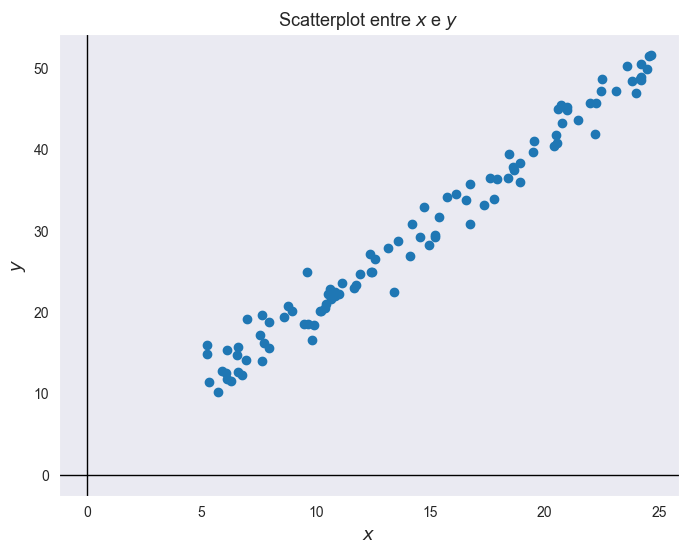

In [21]:
# Aplico Estimadores a datos aleatorios
b_dot   = beta_dot(x,y)
b_tilde = beta_tilde(x,y)

print("Beta del primer estimador es: ",b_dot.round(3))
print("Beta del segundo estimador es: ",b_tilde.round(3))

# Scatterplot entre x e y
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x,y)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
ax.set_title("Scatterplot entre $x$ e $y$", fontsize=13)
ax.set_xlabel("$x$", fontsize=13)
ax.set_ylabel("$y$", fontsize=13)
plt.show()

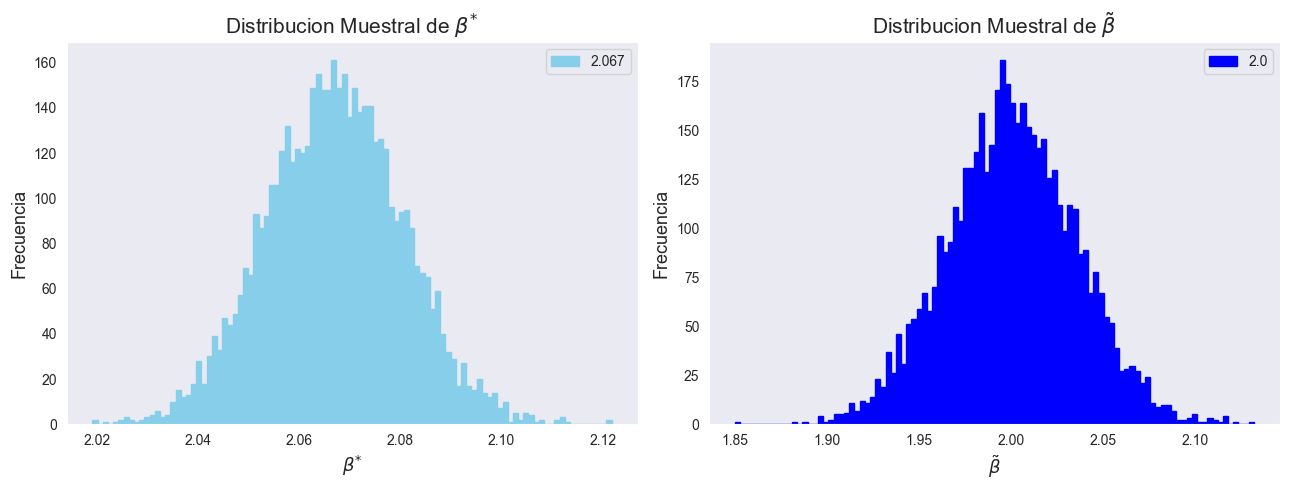

In [22]:
# Genero Almacenadores vac√≠os
b_dot_vec    = []
b_tilde_vec  = []

for n in range(1,sims):
  # Generaci√≥n de Muestras Aleatorias
  x = uniform.rvs(loc=5, scale=20, size = nobs)
  e = norm.rvs(loc=0, scale=2, size = nobs)
  y = beta_0 + beta_1 * x + e

  # Estimadores
  b_dot_loop   = beta_dot(x,y)
  b_tilde_loop = beta_tilde(x,y)

  # Almaceno betas por iteraci√≥n
  b_dot_vec   = np.append(b_dot_vec, b_dot_loop)
  b_tilde_vec = np.append(b_tilde_vec, b_tilde_loop)

# Genero los plot de la distribuci√≥n acumulada e histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plots asociados a las curvas acumuladas
ax1.hist(b_dot_vec, bins=100, label=np.mean(b_dot_vec).round(3),color = "skyblue", ec="skyblue")
ax1.set_xlabel(r"$\beta^{*}$", fontsize = 13)
ax1.set_ylabel("Frecuencia", fontsize = 13)
ax1.set_title(r"Distribucion Muestral de $\beta^{*}$", fontsize=15)
ax1.legend(loc=1)

# Plot Asociados a los histogramas
ax2.hist(b_tilde_vec, bins=100, label=np.mean(b_tilde_vec).round(3), color = "blue", ec="blue")
ax2.set_xlabel(r"$\tilde{\beta}$", fontsize = 13)
ax2.set_ylabel("Frecuencia", fontsize = 13)
ax2.set_title(r"Distribucion Muestral de $\tilde\beta$", fontsize=15)
ax2.legend(loc=1)
plt.tight_layout()

**Ejercicio üñçÔ∏è** (M√°xima Verosimilitud)

Sea el siguiente modelo de regresi√≥n lineal simple:

\begin{equation*}
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i, \quad \varepsilon_i \sim \mathcal{N}(0, \sigma^2)
\end{equation*}

Si consideramos el vector de par√°metros como $\theta = (\beta_0, \beta_1, \sigma^2)$, podemos escribir la funci√≥n de verosimilitud como: 

\begin{equation*}
L(\theta) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - \beta_0 - \beta_1 x_i)^2}{2\sigma^2} \right)
\end{equation*}

\begin{equation*}
\log L(\theta) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2
\end{equation*}

Estime los coeficientes $\beta_0, \beta_1, \sigma^2$ de la funci√≥n log-verosilimitud

\begin{equation*}
\mathcal{L}(\theta) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n(y_i - \beta_0 - \beta_1 x_i)^2
\end{equation*}

In [23]:
from scipy.optimize import minimize

y = df['Precio_TLT'].values
x = df['Tasa10Y'].values

def neg_log_likelihood(params, x, y):
    beta_0, beta_1, log_sigma = params
    sigma = np.exp(log_sigma)  # garantiza que sigma > 0
    residuals = y - (beta_0 + beta_1 * x)
    n = len(y)
    loglike = -0.5 * n * np.log(2 * np.pi * sigma**2) - 0.5 * np.sum(residuals**2) / sigma**2
    return -loglike  # minimizar negativo

# Valores iniciales (pueden ser cualquier n√∫mero razonable)
init_params = [0.0, 0.0, 0.0]  # beta0, beta1, log_sigma

# Minimizaci√≥n
res = minimize(neg_log_likelihood, init_params, args=(x, y))

# Recuperar par√°metros estimados
beta_0_mle, beta_1_mle, log_sigma_mle = res.x
sigma_mle = np.exp(log_sigma_mle)

# Imprimir resultados
print(f"Estimaci√≥n por m√°xima verosimilitud:")
print(f"Intercepto = {beta_0_mle:.4f}")
print(f"Pendiente = {beta_1_mle:.4f}")
print(f"Sigma  = {sigma_mle:.4f}")

Estimaci√≥n por m√°xima verosimilitud:
Intercepto = 142.8554
Pendiente = -14.8853
Sigma  = 8.9559


Consideramos el caso de un modelo de regresi√≥n simple 

\begin{equation*}
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
\end{equation*}

Podemos plantearnos las siguientes preguntas : ¬øHay evidencia de que el valor de $
beta_1$ es 2?, ¬øpodemos considerar que $\beta_1$ es mayor que cero?. En este caso, nos estamos planteando las siguientes hip√≥tesis. ¬ø$\beta_1 = 2$?,  ¬ø$\beta_1 > 0$?. En el contraste de hip√≥tesis. se representan dos hip√≥tesis: La hip√≥tesis nula ($\textsf{H}_0$) y la hip√≥tesis alternativa ($\textsf{H}_1$).

* La Hip√≥tesis Nula siempre con igualdad , pues reprenta el valor que se desea contrastar $\textsf{H}_0 : \beta_1 = 2$
* La Hip√≥tesis alternativa $\textsf{H}_1$ puede ser de tres tipos.
  * $\textsf{H}_1 \neq 2 $
  * $\textsf{H}_1 > 2$
  * $\textsf{H}_1 < 2$

Los contrastes de hip√≥tesis que estaremos haciendo son de tres tipos 

* **Tipo 1** 
  
    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 \neq \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

* **Tipo 2**

    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 > \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

* **Tipo 3**

    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 < \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

La conclusi√≥n de todo contraste de hip√≥tesis es si se rechaza o no la hip√≥tesis nula seg√∫n los datos de la muestra. *NUNCA* en la conclusi√≥n diremos que se acepta la hip√≥tesis nula. La decisi√≥n de rechazar o no la hip√≥tesis nula se realiza seg√∫n una regla de decisi√≥n.

Esta regla es diferente seg√∫n el tipo de contraste (seg√∫n el tipo de hip√≥tesis alternativa). En todos los casos, las reglas se construyen a partir del mismo estad√≠stico. Un estad√≠stico es una variable cuya distribuci√≥n s√≥lo depende de par√°metros conocidos y que se construye a partir de los estimadores MCO de $\beta$ y $\sigma^2$ y la hip√≥tesis nula, y por lo tanto, no va a depender de la hip√≥tesis alternativa.

Recordemos que:

\begin{equation*}
\frac{\widehat{\beta_j}-\beta_j}{\textsf{SE}(\beta_j)} \sim t_{n-k-1} 
\end{equation*}

Bajo la hip√≥tesis nula: $\textsf{H}_0: \beta_{j} = \beta_{j}^0$

\begin{equation*}
\frac{\widehat{\beta_j}-\beta_{j}^{0}}{\textsf{SE}(\beta_j)} \sim t_{n-k-1} 
\end{equation*}

Observa que podemos calcular el valor del estad√≠stico a partir de los valores de una muestra y el valor considerado en la hip√≥tesis nula. Las reglas de decisi√≥n de un contraste se basan en determinar una regi√≥n de rechazo de la hip√≥tesis nula.

Es decir, determinar un conjunto de valores del estad√≠stico tal que si el valor del estad√≠stico obtenido a partir de la muestra est√° dentro de ese conjunto entonces rechazamos la hip√≥tesis nula, y si no lo est√° no rechazamos la hip√≥tesis nula.
La regi√≥n de rechazo depende de la hip√≥tesis alternativa.

* **Tipo 1** En el contraste 
  
    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 \neq \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

    Se rechaza la hip√≥tesis nula $\textsf{H}_0$ para un nivel de significancia $\alpha$ si el verdadero valor del estad√≠stico $t$ cumple: 

    \begin{equation*}
    |t| > t_{n-k-1, \alpha/2}
    \end{equation*}

    Donde $t_{n-k-1, \alpha/2}$ (tambien conocido como valor cr√≠tico) es el valor de la distribuci√≥n $t$-student con $n-k-1$ grados de libertad que tiene a su derecha con probabilidad $\alpha/2$

* **Tipo 2** En el contraste

    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 > \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

    Se rechaza la hip√≥tesis nula $\textsf{H}_0$ para un nivel de significancia $\alpha$ si el verdadero valor del estad√≠stico $t$ cumple: 

    \begin{equation*}
    t > t_{n-k-1, \alpha}
    \end{equation*}

    Donde $t_{n-k-1, \alpha}$ es el valor de la distribuci√≥n $t$-student con $n-k-1$ grados de libertad que tiene a su derecha con probabilidad $\alpha$

* **Tipo 3** En el contraste

    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 < \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

    Se rechaza la hip√≥tesis nula $\textsf{H}_0$ para un nivel de significancia $\alpha$ si el verdadero valor del estad√≠stico $t$ cumple: 

    \begin{equation*}
    t < -t_{n-k-1, \alpha}
    \end{equation*}

    Donde $t_{n-k-1, \alpha}$ es el valor de la distribuci√≥n $t$-student con $n-k-1$ grados de libertad que tiene a su derecha con probabilidad $\alpha$


**Ejercicio üñçÔ∏è** ¬øExplica la Tasa a 10 a√±os el precio de TLT?

In [24]:
model = smf.ols(formula = 'Precio_TLT ~ Tasa10Y', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Precio_TLT   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.77e-29
Time:                        16:09:51   Log-Likelihood:                -390.02
No. Observations:                 108   AIC:                             784.0
Df Residuals:                     106   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.8554      2.335     61.178      0.000     138.226     147.485
Tasa10Y      -14.8853      0.946    -15.728      0.000     -16.762     -13.009
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.852
Skew:                          -0.383   Prob(JB):                       0.0197
Kurtosis:                       1.924   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\textsf{H}_0$ indica si la tasa a 10 a√±os no explica el precio de TLT, mientras que $\textsf{H}_1$ indica que la tasa si tiene un efecto sobre el precio. La prueba de hip√≥tesis a contrastar es:

\begin{equation*}
\begin{aligned}
\textsf{H}_0 &: \beta_1 =  0 \\
\textsf{H}_1 &: \beta_1 \neq 0
\end{aligned}
\end{equation*}

El estad√≠stico de prueba es : 

\begin{equation*}
\frac{\widehat{\beta_1} - 0}{\textsf{SE}(\beta_1)} = \frac{-14.8853}{0.946} = -15.728
\end{equation*}

La distribuci√≥n bajo $\textsf{H}_0$ : $t_{n-k-1} = t_{106}$

In [25]:
model.df_resid

106.0

In [26]:
from scipy.stats import t

df_resid = model.df_resid # n-k (en k contiene ya el 1 por el intercepto)

alpha = 0.05 
t_critico = t.ppf(1-alpha/2, df = df_resid)

print(f"Valor cr√≠tico t : {t_critico:.4f}")

Valor cr√≠tico t : 1.9826


Se rechaza la hip√≥tesis nula $\textsf{H}_0$ para un nivel de significancia $\alpha$ si el verdadero valor del estad√≠stico $t$ cumple: 

\begin{equation*}
|t| > t_{n-k-1, \alpha/2}
\end{equation*}

$|t_{\beta_1}| = |-15.728| = 15.728 > t_{c}=1.9826$

Por tanto, existe evidencia estad√≠sticamente significativa de que el coeficiente $\beta_1$ es distinto de 0, es decir, la variable *Tasa10Y* tiene un efecto significativo sobre el *Precio_TLT*. Ademas, $R^2 = 0.70$ indica que el modelo explica el 70% de la variabilidad del precio de TLT. La pendiente negativa $\beta_1 \approx -14.89$ sugiere que una subida de 1 punto en la tasa a 10 a√±os se asocia con una ca√≠da de aproximadamente 14.89 en el precio del ETF TLT, lo cual es coherente con la teor√≠a financiera.

Otra forma de contrastar hip√≥tesis es mediante el $\textsf{p-value}$, este mide la probabilidad de observar un valor tan extremo o m√°s extremo que el observado, bajo el supuesto de que la hip√≥tesis nula $\textsf{H}_0$ es cierta. La regla de decision es si $\textsf{p-value}$ es mucho menor que 0.05 entonces hay evidencia muy fuerte de que $\beta_1 \neq 0$

In [27]:
t_obs = -15.728 # t-ratio de beta_1 
df = df_resid

# p-valor bilateral
p_value = 2 * t.sf(abs(t_obs), df)
print(f"p-valor (bilateral): {p_value:.4e}")

p-valor (bilateral): 1.7743e-29


Rechazamos la hip√≥tesis nula al 5% de significancia. La variable explicativa tiene un efecto estad√≠sticamente significativo sobre la respuesta.

## ü¶ï Regresi√≥n Lineal M√∫ltiple

Cuando revisamos el modelo simple (con una sola variable explicativa), teniamos el siguiente modelo.

\begin{equation*}
y_{i} = \beta_{0} + \beta_{1}x_{i,1} + \epsilon_{i} 
\end{equation*}

Y la explicacion que encontramos, es que la variable $y$ estaria siendo explicada por una constante $\beta_0$, la variable $x_1$ con un coeficiente $\beta_1$ y una perturbacion aleatoria $\epsilon$ 

**Problema ‚ö†Ô∏è** Dado que el modelo de regresi√≥n simple solo tiene en cuenta una variable explicativa $x$ podemos estar sobre-estimando o infra-estimando el efecto de una variaci√≥n en la variable $x_1$ causa en la variable explicada $y$.

El caso del modelo de regresi√≥n m√∫ltiple (con m√∫ltiples variables explicativas), se define como:

\begin{equation*}
y_{i} = \beta_{0} + \beta_{1}x_{i,1} + \beta_{2}x_{i,2} + \cdots + + \beta_{k}x_{i,k}\epsilon_{i} 
\end{equation*}

La diferencia, es que en esta formulaci√≥n, estamos considerando que $y$, no solo depende de $x_1$, sino que puede depender de multples variables explicativas $\{x_1, x_2,\cdots x_k\}$ y cada uno con su respectivo $\beta_{k}$ asociado. Sin embargo en el caso del modelo m√∫ltiple existe un inconveniente ; *A medida que aumenta el n√∫mero de variables, el c√°lculo de los estimadores de los $\beta$ se hace engorroso*

Consideremos la siguiente extensi√≥n del modelo simple a m√∫ltiples variables.

\begin{equation*}
\begin{aligned}
y_{1} &= \beta_{0} + \beta_{1}x_{11} + \beta_{2}x_{12} + \beta_{3}x_{13} + \cdots + \beta_{k}x_{1k} + \epsilon_{1} \\
y_{2} &= \beta_{0} + \beta_{1}x_{21} + \beta_{2}x_{22} + \beta_{3}x_{23} + \cdots + \beta_{k}x_{2k} + \epsilon_{2} \\
y_{3} &= \beta_{0} + \beta_{1}x_{31} + \beta_{2}x_{32} + \beta_{3}x_{33} + \cdots + \beta_{k}x_{3k} + \epsilon_{3} \\
y_{4} &= \beta_{0} + \beta_{1}x_{41} + \beta_{2}x_{42} + \beta_{3}x_{43} + \cdots + \beta_{k}x_{4k} + \epsilon_{4} \\
\ldots & \quad\ldots\quad\ldots\quad\ldots\quad\ldots\quad\ldots\quad\ldots\quad\ldots \\
y_{n} &= \beta_{0} + \beta_{1}x_{n1} + \beta_{2}x_{n2} + \beta_{3}x_{n3} + \cdots + \beta_{nk}x_{nk} + \epsilon_{n} 
\end{aligned}
\end{equation*}

El sistema de ecuaciones anterior, se puede escribir de forma matricial como:

\begin{equation*}
\underbrace{\begin{bmatrix}
y_1     \\
y_2     \\
y_3     \\
y_4     \\
\vdots  \\
y_n     \\
            \end{bmatrix}
            }_{Y_{n\times 1}}
                =
\underbrace{\begin{bmatrix}
1       &   x_{11}  & x_{12} & x_{13} & \dots     &   x_{1k}       \\
1       &   x_{21}  & x_{22} & x_{23} & \dots     &   x_{2k}       \\
1       &   x_{31}  & x_{32} & x_{33} & \dots     &   x_{3k}       \\
1       &   x_{41}  & x_{42} & x_{43} & \dots     &   x_{4k}       \\
\vdots  &  \vdots   & \vdots & \vdots  & \vdots  &   \vdots  \\   
1       &   x_{n1}  & x_{n2} & x_{n3} &\dots     &   x_{nk}       \\
            \end{bmatrix}
            }_{X_{n\times k}}
\underbrace{\begin{bmatrix}
\beta_0     \\
\beta_1     \\
\beta_2     \\
\beta_3     \\
\vdots  \\
\beta_k     \\
            \end{bmatrix}
            }_{\beta_{k\times 1}}
                +
\underbrace{\begin{bmatrix}
\epsilon_1     \\
\epsilon_2     \\
\epsilon_3     \\
\epsilon_4     \\
\vdots  \\
\epsilon_n     \\
            \end{bmatrix}
            }_{\epsilon_{n\times 1}}
\end{equation*}

En otras palabras, podemos escribir tal modelo en forma reducida como $Y=X\beta + \epsilon$

El modelo estimado que predice para la observaci√≥n i-√©sima es:

\begin{equation*}
\widehat{y_{i}} = \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
\widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k}
\end{equation*} 

El error del modelo viene dado por:

\begin{equation*}
\epsilon_{i} = y_{i} - \left(\widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
\widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k}\right)
\end{equation*} 

Donde $\widehat{\beta_{0}},\widehat{\beta_{1}},\cdots,\widehat{\beta_{k}}$ 
son los valores estimados del modelo m√∫ltiple.

El criterio de m√≠nimos cuadrados asigna $\widehat{\beta_{0}},\widehat{\beta_{1}},\cdots,\widehat{\beta_{k}}$ el valor que minimiza la suma de errores al cuadrado de todas las observaciones.

As√≠ como podemos escribir el modelo de la forma $Y=X\beta + \epsilon$, de la misma
manera podemos escribir el modelo ajustado, es decir, $\widehat{Y} = X\widehat{\beta}$ con $Y-\widehat{Y} = \epsilon$

### Estimaci√≥n de Coeficientes

Sea el modelo $y_{i} = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots + \beta_{k} x_{ik} + \epsilon_{i}$. Para el caso del modelo simple, vimos que podemos escribir la suma de cuadrado de los errores de la siguiente forma:

\begin{equation*}
S = \sum_{i=1}^{n}\widehat{\epsilon_{i}}^2 = \sum_{i=1}^{n}\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right)^2
\end{equation*}

Para aplicar el criterio de m√≠nimos cuadrados en el modelo de regresi√≥n m√∫ltiple, 
calculamos la primera derivada de $S$ con respecto a cada $\beta_{j}$, es decir.

\begin{equation*}
\begin{aligned}
\frac{\partial S}{\partial\widehat{\beta_{0}}} &= 
2\sum_{i=1}^{n}\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right)(-1) \\ 
\frac{\partial S}{\partial\widehat{\beta_{1}}} &= 
2\sum_{i=1}^{n}\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right)(-x_{1i}) \\ 
\frac{\partial S}{\partial\widehat{\beta_{2}}} &= 
2\sum_{i=1}^{n}\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right)(-x_{2i}) \\
\cdots & \cdots\quad\quad\cdots\cdots\quad\quad\cdots\cdots\quad\cdots\cdots\quad \cdots\cdots\quad\cdots\cdots\\
\frac{\partial S}{\partial\widehat{\beta_{k}}} &= 
2\sum_{i=1}^{n}\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right)(-x_{ki})
\end{aligned}
\end{equation*}

Los estimadores m√≠nimos cuadrados se obtienen al igualar a 0 las derivadas anteriores.

\begin{equation*}
\begin{aligned}
\sum_{i=1}^{n}&\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right) = 0 \\ 
\sum_{i=1}^{n}&\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right)x_{1i} = 0 \\ 
\sum_{i=1}^{n}&\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right)x_{2i} = 0 \\
\cdots & \cdots\quad\quad\cdots\cdots\quad\quad\cdots\cdots\quad\quad\cdots\cdots\quad\cdots\cdots\quad  \\
\sum_{i=1}^{n}&\left(
    y_{i} - \widehat{\beta_{0}} + \widehat{\beta_{1}}x_{1i} + 
    \widehat{\beta_{2}}x_{2i} + \cdots + \widehat{\beta_{k}}x_{1k} \right)x_{ki}=0 
\end{aligned}
\end{equation*}

Resolviendo las sumatorias se tiene el siguiente sistema de ecuaciones.

\begin{equation*}
\begin{aligned}
\sum_{i=1}^{n}&y_{i} -n\widehat{\beta_0} - \widehat{\beta_1}\sum_{i=1}^{n}x_{i1} - 
\widehat{\beta_2}\sum_{i=1}^{n}x_{i2} -\cdots - \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}=0 \\
\sum_{i=1}^{n}&y_{i}x_{i1} -\widehat{\beta_0}\sum_{i=1}^{n}x_{i1} - 
\widehat{\beta_1}\sum_{i=1}^{n}x_{i1}^2 - \widehat{\beta_2}\sum_{i=1}^{n}x_{i2}x_{i1} 
-\cdots - \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}x_{i1}=0\\
\sum_{i=1}^{n}&y_{i}x_{i2} -\widehat{\beta_0}\sum_{i=1}^{n}x_{i2} - 
\widehat{\beta_1}\sum_{i=1}^{n}x_{i1}x_{i2} - \widehat{\beta_2}\sum_{i=1}^{n}x_{i2}^2 
-\cdots - \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}x_{i2}=0\\
\sum_{i=1}^{n}&y_{i}x_{i13} -\widehat{\beta_0}\sum_{i=1}^{n}x_{i3} - 
\widehat{\beta_1}\sum_{i=1}^{n}x_{i1}x_{i3} - \widehat{\beta_2}\sum_{i=1}^{n}x_{i2}x_{i3}
-\cdots - \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}x_{i3}=0 \\
\cdots&\cdots\quad\quad\cdots\cdots\quad\quad\cdots\cdots\quad\quad\cdots\cdots\quad\cdots \\
\sum_{i=1}^{n}&y_{i}x_{i1k} -\widehat{\beta_0}\sum_{i=1}^{n}x_{ik} - 
\widehat{\beta_1}\sum_{i=1}^{n}x_{i1}x_{ik} - \widehat{\beta_2}\sum_{i=1}^{n}x_{i2}x_{ik} 
-\cdots - \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}^2=0
\end{aligned}
\end{equation*}

Resolviendo las sumatorias se tiene el siguiente sistema de ecuaciones.

\begin{equation*}
\begin{aligned}
\sum_{i=1}^{n}y_{i} &= n\widehat{\beta_0} + \widehat{\beta_1}\sum_{i=1}^{n}x_{i1} + 
\widehat{\beta_2}\sum_{i=1}^{n}x_{i2} + \cdots + \widehat{\beta_k}\sum_{i=1}^{n}x_{ik} \\
\sum_{i=1}^{n}y_{i}x_{i1} &= \widehat{\beta_0}\sum_{i=1}^{n}x_{i1} + 
\widehat{\beta_1}\sum_{i=1}^{n}x_{i1}^2 + \widehat{\beta_2}\sum_{i=1}^{n}x_{i2}x_{i1} + 
\cdots + \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}x_{i1} \\
\sum_{i=1}^{n}y_{i}x_{i2} &= \widehat{\beta_0}\sum_{i=1}^{n}x_{i2} + 
\widehat{\beta_1}\sum_{i=1}^{n}x_{i1}x_{i2} + \widehat{\beta_2}\sum_{i=1}^{n}x_{i2}^2 +
\cdots + \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}x_{i2} \\
\sum_{i=1}^{n}y_{i}x_{i13} &= \widehat{\beta_0}\sum_{i=1}^{n}x_{i3} + 
\widehat{\beta_1}\sum_{i=1}^{n}x_{i1}x_{i3} + \widehat{\beta_2}\sum_{i=1}^{n}x_{i2}x_{i3} +
\cdots + \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}x_{i3} \\
\cdots & \cdots\quad\quad\cdots\cdots\quad\quad\cdots\cdots\quad\quad\cdots\cdots\quad\cdots\\
\sum_{i=1}^{n}y_{i}x_{i1k} &= \widehat{\beta_0}\sum_{i=1}^{n}x_{ik} + 
\widehat{\beta_1}\sum_{i=1}^{n}x_{i1}x_{ik} + \widehat{\beta_2}\sum_{i=1}^{n}x_{i2}x_{ik} +
\cdots + \widehat{\beta_k}\sum_{i=1}^{n}x_{ik}^2
\end{aligned}
\end{equation*}

\begin{equation*}
\underbrace{\begin{bmatrix}
\sum_{i=1}^{n}y_{i}     \\
\sum_{i=1}^{n}y_{i}x_{i1}    \\
\sum_{i=1}^{n}y_{i}x_{i2}     \\
\vdots  \\
\sum_{i=1}^{n}y_{i}x_{i1k}    \\
            \end{bmatrix}
            }_{X^{T}Y}
                =
\underbrace{\begin{bmatrix}
n  & \sum_{i=1}^{n}x_{i1} & \sum_{i=1}^{n}x_{i2} &  \dots & \sum_{i=1}^{n}x_{ik} \\
\sum_{i=1}^{n}x_{i1} & \sum_{i=1}^{n}x_{i1}^2  & \sum_{i=1}^{n}x_{i2}x_{i1} & \dots &   \sum_{i=1}^{n}x_{ik}x_{i1} \\
\sum_{i=1}^{n}x_{i2} & \sum_{i=1}^{n}x_{i1}x_{i2} & \sum_{i=1}^{n}x_{i2}^2 & \dots &   \sum_{i=1}^{n}x_{ik}x_{i2}       \\
\vdots  &  \vdots   & \vdots & \vdots  & \vdots  &   \vdots  \\   
\sum_{i=1}^{n}x_{ik} & \sum_{i=1}^{n}x_{i1}x_{ik} & \sum_{i=1}^{n}x_{i2}x_{ik}  & \dots &   \sum_{i=1}^{n}x_{ik}^2
            \end{bmatrix}
            }_{X^{T}X}
\underbrace{\begin{bmatrix}
\widehat{\beta_0}     \\
\widehat{\beta_1}     \\
\widehat{\beta_2}     \\
\vdots  \\
\widehat{\beta_k}     \\
            \end{bmatrix}
            }_{\widehat{\beta}}
\end{equation*}

Resumiendo, tenemos que:

\begin{equation*}
X^{T}Y= X^{T}X\widehat{\beta} 
\end{equation*}

No obstante, para poder encontrar los coeficientes $\beta_{j}$ del vector 
$\widehat{\beta}$, la matrix $X^{T}X$ debe cumplir una condici√≥n necesaria, esta debe ser **invertible**.

* **Definici√≥n 1:** Una matriz $A$ de orden $n$ se dice que es *invertible*, *no singular* o *regular* si existe otra matriz cuadrada de orden $n$ llamada *matriz inversa* de $A$ representada como $A^{-1}$ tal que $A\cdot A^{-1}=A^{-1}\cdot A=I_{n}$ donde $I_{n}$ es la matriz identidad de orden $n$ y el producto
de matrices, es el producto de matrices usual. 

* **Definici√≥n 2** El rango de una matriz es el n√∫mero m√°ximo de columnas que son linealmente independientes.

* **Observaci√≥n** Una matriz A es invertible *si y solo si* su rango es completo. Es decir $\hbox{rang}(A)=k$ con $k$ columnas linealmente independientes.
Para obtener los estimadores del modelo, basta con pre-multiplicar por su inversa, es decir $(X^{T}X)^{-1}$, luego:
$$ (X^{T}X)^{-1}X^{T}Y= \underbrace{(X^{T}X)^{-1}X^{T}X}_{I_{n}}\widehat{\beta} $$

Por lo tanto, los estimadores del modelo m√∫ltiple son:

\begin{equation*}
\widehat{\beta} = (X^{T}X)^{-1}X^{T}Y
\end{equation*}

En el caso de la regresi√≥n lineal con una sola variable, bajo el supuesto de normalidad, $\epsilon \sim \mathcal{N}(0,\sigma^2)$, sin embargo, ahora en el caso m√∫ltiple, esta definici√≥n cambia a que $\epsilon \sim \mathcal{N}(0,\sigma^2 I_{n})$, donde $I_{n}$ es la matriz identidad de orden $n$.